In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

## Predict reaction

In [4]:
import os
import torch
from rxnscribe import RxnScribe
import matplotlib.pyplot as plt
from huggingface_hub import hf_hub_download
from molscribe import MolScribe

ckpt_path = '/home/ctleungaf/ChemEagle/RxnScribe_main/ckpt/pix2seq_reaction_full.ckpt'
model = RxnScribe(ckpt_path, device=torch.device('cpu'))

image_file = "/home/ctleungaf/ChemEagle/imgs/Benzilicacidrearrangement.png"

device = torch.device('cpu')

predictions = model.predict_image_file(image_file, molscribe=True, ocr=True)

ModuleNotFoundError: No module named 'molscribe'

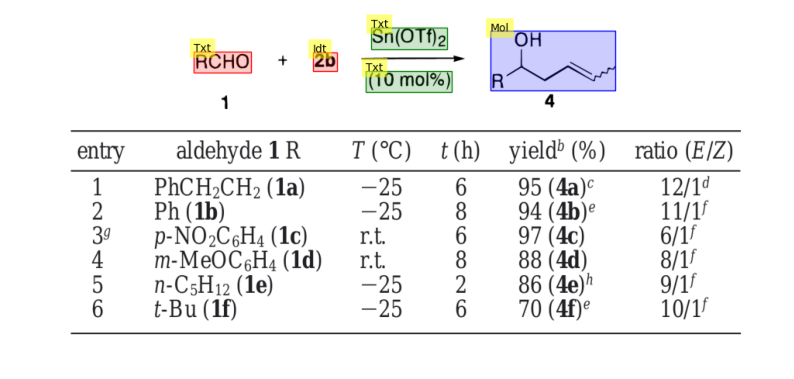

{"reactants": [{"category": "[Txt]", "bbox": [0.18659329664832416, 0.08402747415711087, 0.27163581790895447, 0.15081854335891695], "category_id": 2, "text": ["RCHO"]}, {"category": "[Idt]", "bbox": [0.3626813406703352, 0.0872593000862305, 0.39869934967483744, 0.1475867174297973], "category_id": 3, "text": ["2b"]}], "conditions": [{"category": "[Txt]", "bbox": [0.448224112056028, 0.007540927167945847, 0.5612806403201601, 0.07648654698916502], "category_id": 2, "text": ["Sn(OTf)2"]}, {"category": "[Txt]", "bbox": [0.4412206103051526, 0.14650944212009073, 0.567783891945973, 0.21437778663160337], "category_id": 2, "text": ["(10 mol% "]}], "products": [{"category": "[Mol]", "bbox": [0.6253126563281641, 0.019390955574717893, 0.8104052026013007, 0.20791413477336407], "category_id": 1, "smiles": "*C(O)C/C=C/C", "molfile": "\n     RDKit          2D\n\n  7  6  0  0  0  0  0  0  0  0999 V2000\n   21.1145   -4.9843    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   17.2602   -7.2677    0.0000 C 

In [7]:
import json

output = model.draw_predictions(predictions, image_file=image_file)
for i, img in enumerate(output):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.axis('off')
    ax.imshow(img)
    plt.show()
    print(json.dumps(predictions[i]))